# Pre Analysis of Climate Sensor Data

##### Imports

In [ ]:
# Imports
# Standard
import pandas as pd
import numpy as np
import os

# Plots
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette("colorblind"))
sns.set(rc={'figure.facecolor':'white'})

#Plotly


##### Load Data

In [43]:
df_pedestrian = pd.read_csv("../../data/raw/Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv")
df_sensors = pd.read_csv("../../data/raw/Pedestrian_Counting_System_-_Sensor_Locations.csv")
df_pedestrian = df_pedestrian.rename(columns={'Sensor_ID':'sensor_id'})

In [27]:
df_pedestrian.head(5)

,ID,Date_Time,Year,Month,Mdate,Day,Time,sensor_id,Sensor_Name,Hourly_Counts
0,2887628,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,36,Queen St (West),774


In [23]:
df_sensors.head(5)

,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
sensor_id,,,,,,,,,,
55,Elizabeth St-La Trobe St (East),Eli380_T,2018/07/19,A,NaN,North,South,-37.809889,144.961343,"(-37.80988941, 144.96134331)"
45,Little Collins St-Swanston St (East),Swa148_T,2017/06/29,A,NaN,North,South,-37.814141,144.966094,"(-37.81414074, 144.9660938)"
61,RMIT Building 14,RMIT14_T,2019/06/28,A,NaN,North,South,-37.807675,144.963091,"(-37.80767455, 144.96309115)"
7,Birrarung Marr,Fed_T,2014/12/17,A,NaN,East,West,-37.818629,144.971694,"(-37.81862929, 144.97169395)"
72,Flinders St- ACMI,ACMI_T,2020/11/30,A,NaN,East,West,-37.817263,144.968728,"(-37.81726337, 144.96872809)"


##### Join datasets

In [37]:
df_pedestrian

,ID,Date_Time,Year,Month,Mdate,Day,Time,sensor_id,Sensor_Name,Hourly_Counts
0,2887628,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...,...
4176213,4181685,"February 24, 2022 08:00:00 PM",2022,February,24,Thursday,20,86,Queensberry St - Errol St (South),69
4176214,4181686,"February 24, 2022 09:00:00 PM",2022,February,24,Thursday,21,86,Queensberry St - Errol St (South),46
4176215,4181687,"February 24, 2022 10:00:00 PM",2022,February,24,Thursday,22,86,Queensberry St - Errol St (South),52
4176216,4181688,"February 24, 2022 11:00:00 PM",2022,February,24,Thursday,23,86,Queensberry St - Errol St (South),9


In [45]:
df = df_pedestrian.join(df_sensors,on='sensor_id',how='inner',rsuffix='_sensor').reset_index()

In [41]:
df_pedestrian.sensor_id.value_counts()

9     112480
2     112243
6     112049
10    111921
18    111303
       ...  
73      3648
60      2291
84      1416
85      1416
86      1081
Name: sensor_id, Length: 81, dtype: int64

In [44]:
df_sensors.sensor_id.value_counts()

55    1
37    1
26    1
49    1
18    1
     ..
33    1
71    1
70    1
29    1
79    1
Name: sensor_id, Length: 78, dtype: int64

In [46]:
df

,index,ID,Date_Time,Year,Month,Mdate,Day,Time,sensor_id,Sensor_Name,...,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,0,2887628,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,34,Flinders St-Spark La,...,Pelham St (South),Pel147_T,2017/07/10,A,NaN,West,East,-37.802407,144.961567,"(-37.80240719, 144.96156731)"
1,55,2887683,"November 01, 2019 06:00:00 PM",2019,November,1,Friday,18,34,Flinders St-Spark La,...,Pelham St (South),Pel147_T,2017/07/10,A,NaN,West,East,-37.802407,144.961567,"(-37.80240719, 144.96156731)"
2,110,2887738,"November 01, 2019 07:00:00 PM",2019,November,1,Friday,19,34,Flinders St-Spark La,...,Pelham St (South),Pel147_T,2017/07/10,A,NaN,West,East,-37.802407,144.961567,"(-37.80240719, 144.96156731)"
3,165,2887793,"November 01, 2019 08:00:00 PM",2019,November,1,Friday,20,34,Flinders St-Spark La,...,Pelham St (South),Pel147_T,2017/07/10,A,NaN,West,East,-37.802407,144.961567,"(-37.80240719, 144.96156731)"
4,221,2887848,"November 01, 2019 09:00:00 PM",2019,November,1,Friday,21,34,Flinders St-Spark La,...,Pelham St (South),Pel147_T,2017/07/10,A,NaN,West,East,-37.802407,144.961567,"(-37.80240719, 144.96156731)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160901,4173620,4179092,"February 28, 2022 07:00:00 PM",2022,February,28,Monday,19,77,Harbour Esplanade (West) - Ped Path,...,Flinders St (South),FliSS_T,2021/09/10,A,NaN,West,East,-37.817940,144.966167,"(-37.81794046, 144.96616678)"
4160902,4173621,4179093,"February 28, 2022 08:00:00 PM",2022,February,28,Monday,20,77,Harbour Esplanade (West) - Ped Path,...,Flinders St (South),FliSS_T,2021/09/10,A,NaN,West,East,-37.817940,144.966167,"(-37.81794046, 144.96616678)"
4160903,4173622,4179094,"February 28, 2022 09:00:00 PM",2022,February,28,Monday,21,77,Harbour Esplanade (West) - Ped Path,...,Flinders St (South),FliSS_T,2021/09/10,A,NaN,West,East,-37.817940,144.966167,"(-37.81794046, 144.96616678)"
4160904,4173623,4179095,"February 28, 2022 10:00:00 PM",2022,February,28,Monday,22,77,Harbour Esplanade (West) - Ped Path,...,Flinders St (South),FliSS_T,2021/09/10,A,NaN,West,East,-37.817940,144.966167,"(-37.81794046, 144.96616678)"


##### Preprocess columns

In [47]:
# To datetime columns
df.Date_Time = pd.to_datetime(df.Date_Time)



<AxesSubplot:>

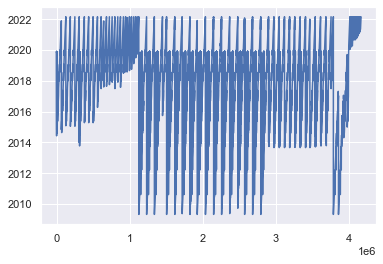

In [54]:
df.Date_Time.plot()

<AxesSubplot:xlabel='Date_Time'>

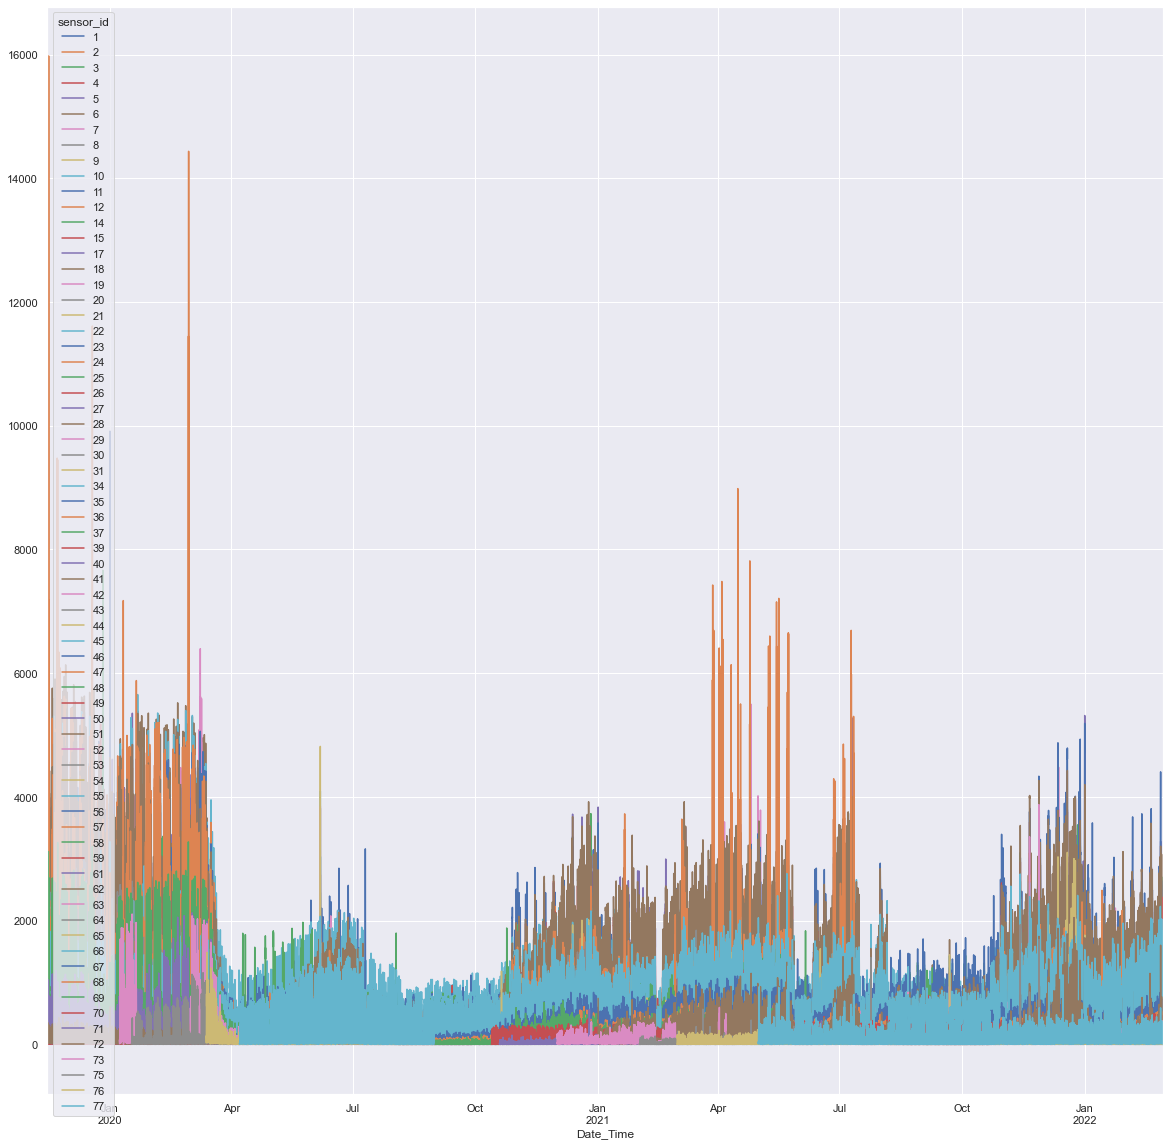

In [60]:
df2 = df[df.Date_Time > pd.to_datetime('2019-11-15')]
df2 = df2.pivot(index='Date_Time', columns='sensor_id', values='Hourly_Counts')
df2.plot(figsize=(20,20))

In [ ]:

# Drop location_sensor (we already have latitude/longitude)
df.drop('location_sensor',axis=1,inplace=True)

# Drop last_data_sensor (we have measurements)
df.drop('last_data_sensor',axis=1,inplace=True)

In [9]:
df.to_csv('../../data/preproccesed/Climate_Data_joined.csv')